<a href="https://colab.research.google.com/github/luigui077/Analisis-y-visualizacion-de-datos/blob/main/Estadistica_inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicaciones de R para el estudio de la Estadística Inferencial

A partir de esta sección veremos como podemos utilizar R para estudiar los fundamentos de la Inferencia Estadística, nos apoyaremos principalmente en la realización de simulaciones para verificar las propiedades, teoremas y supuestos que conforman la teoría de la inferencia estadística.

In [ ]:
install.packages("RcmdrMisc")
library("RcmdrMisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘checkmate’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘gridExtra’, ‘htmlTable’, ‘proxy’, ‘car’, ‘sandwich’, ‘abind’, ‘colorspace’, ‘Hmisc’, ‘e1071’, ‘readstata13’, ‘nortest’


Loading required package: car

Loading required package: carData

Loading required package: sandwich



In [ ]:
# Muestra aleatoria extraída CON REPOSICIÓN de la población P
P=c(1,2,3,4,5,6,7,8,9,10)
muestra1=sample(P,5,rep=T)
muestra1

[1] 6 1 8 6 1

In [ ]:
# Muestra aleatoria extraida SIN reposición de la población P
P=c(1,2,3,4,5,6,7,8,9,10)
muestra1=sample(P,5,rep=F)
muestra1

[1] 5 1 7 4 8

In [ ]:
# 10 Muestras aleatorias de tamaño 3 obtenidas con reposición de la población P
muestras1<-sapply(1:10, function(x){(sample(P,3,rep=T))})
muestras1

6,4,1,3,8,6,5,10,5,1
8,7,6,5,4,4,2,4,6,6
8,9,5,6,8,10,5,9,6,1


In [ ]:
# 10 Muestras aleatorias de tamaño 3 obtenidas sin reposición de la población P
muestras2<-sapply(1:10, function(x){(sample(P,3,rep=F))})
muestras2

2,4,3,8,8,6,2,2,7,8
10,1,10,5,7,8,7,7,1,1
8,2,8,9,10,7,5,1,10,7


In [ ]:
Data=seq(1000,2000,1)
Data

[1] 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
  [15] 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
  [29] 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
  [43] 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
  [57] 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
  [71] 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
  [85] 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
  [99] 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 [113] 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 [127] 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 [141] 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 [155] 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 [169] 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 [183] 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195
 [197] 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209
 [211] 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223
 [225] 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237
 [239] 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251
 [253] 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265
 [267] 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279
 [281] 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293
 [295] 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307
 [309] 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321
 [323] 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335
 [337] 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349
 [351] 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363
 [365] 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377
 [379] 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391
 [393] 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405
 [407] 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419
 [421] 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433
 [435] 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447
 [449] 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461
 [463] 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475
 [477] 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489
 [491] 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502 1503
 [505] 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517
 [519] 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531
 [533] 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545
 [547] 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558 1559
 [561] 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571 1572 1573
 [575] 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585 1586 1587
 [589] 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599 1600 1601
 [603] 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615
 [617] 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629
 [631] 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643
 [645] 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655 1656 1657
 [659] 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671
 [673] 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685
 [687] 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699
 [701] 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1713
 [715] 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727

In [ ]:
set.seed(333)
n <- 1000
s_size <- round(.1*n,0)

#la muestra
psuedoData <- Data[sample(x=1:n,size=s_size)]
psuedoData

[1] 1909 1424 1310 1577 1294 1315 1001 1645 1066 1555 1214 1358 1039 1574 1160
 [16] 1342 1842 1345 1414 1325 1348 1589 1227 1133 1122 1440 1917 1976 1271 1837
 [31] 1290 1112 1457 1379 1116 1537 1265 1527 1835 1368 1764 1332 1969 1776 1501
 [46] 1308 1159 1620 1362 1680 1981 1104 1658 1183 1203 1519 1939 1797 1974 1556
 [61] 1418 1256 1423 1622 1709 1665 1407 1057 1276 1883 1873 1980 1044 1902 1390
 [76] 1174 1412 1572 1386 1389 1815 1481 1033 1613 1660 1300 1469 1766 1932 1772
 [91] 1528 1139 1311 1856 1644 1189 1865 1087 1872 1930

In [ ]:
empleados=seq(1,2850,by=1)

head(empleados)

[1] 1 2 3 4 5 6

In [ ]:
tail(empleados)

[1] 2845 2846 2847 2848 2849 2850

In [ ]:
muestra_empleados=sample(empleados,285,replace=F)
muestra_empleados

[1]  247 1415 2299 2142 1191 1104 1960 1645 2635 1347 1511  834  244  920 1238
 [16] 1640 2452 2493  573  255  899 1649  969 1957  788  807 2376  329 1871 1749
 [31] 1061 2675 1006  278 1220 1862  517 2291 2825 2259 1373 1722 1630   32  354
 [46]  618  451 2430 1451 1758 2363  581 2685  909 1513   56 2751  873 1501 1316
 [61] 1214 1308 2686  513  185 1618 2754 2846  645  253 2272 1837 1157  117 2469
 [76]  350 1403 2149 2156 1835  201  361 2131 2137 2356 1697  216  464 2530 1273
 [91] 2337 1914  418 2215 1710 2308   47  578 2014 2544 1432   39   59  610 2117
[106]  565 2480 2534 1208 1779  566 1784  717 2528 1654 2191 2157  802  636  538
[121] 2753 1154  970 2244 2134  110 2442  429 1217  737  215 1174 1487 2494 2604
[136] 2812 1248   24 1865 1921 1773 2725 1599 2622   43 2772  949 1941  765 1441
[151]  775 1712 1975 2498 2213 2643  358 1361 1358 1703 1890  432  812 1256 2152
[166] 1222 2348 1920 1496 2540 1946  391  511 1685  473 2047 1569 2781 1806 1309
[181] 2609  627  629  516 2511 1167 2616  989 2791  673 2642  116  894 1673  499
[196]  956 1097 1326 2346  208 2467 2095    5  863 2166 2072 2278  601 2267 1030
[211] 1476 1576  274 2520 1453  962 1428 2720  409 1059  533 1003 2592 2491 2378
[226] 2342   50  148 1746 2413  341 2432 2461 2489  186 2307  808 2009  296  750
[241] 1437 1714  149 1628  348 2365  442 1334 2654 1910 2726  676  319  701  568
[256] 1025 1660 1675 2752 1016 1536 2802 2834  406  315 2164 1286 2842 2584  762
[271] 1110  592 1478 1227 1560 1149  685  678 2087  577 1180  469  211 1133  297

In [ ]:
sexo=rbinom(2850,1,0.8)
head(sexo)

[1] 1 1 0 1 0 1

In [ ]:
tail(sexo)

[1] 1 1 1 1 0 1

In [ ]:
summary(sexo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.7982  1.0000  1.0000 

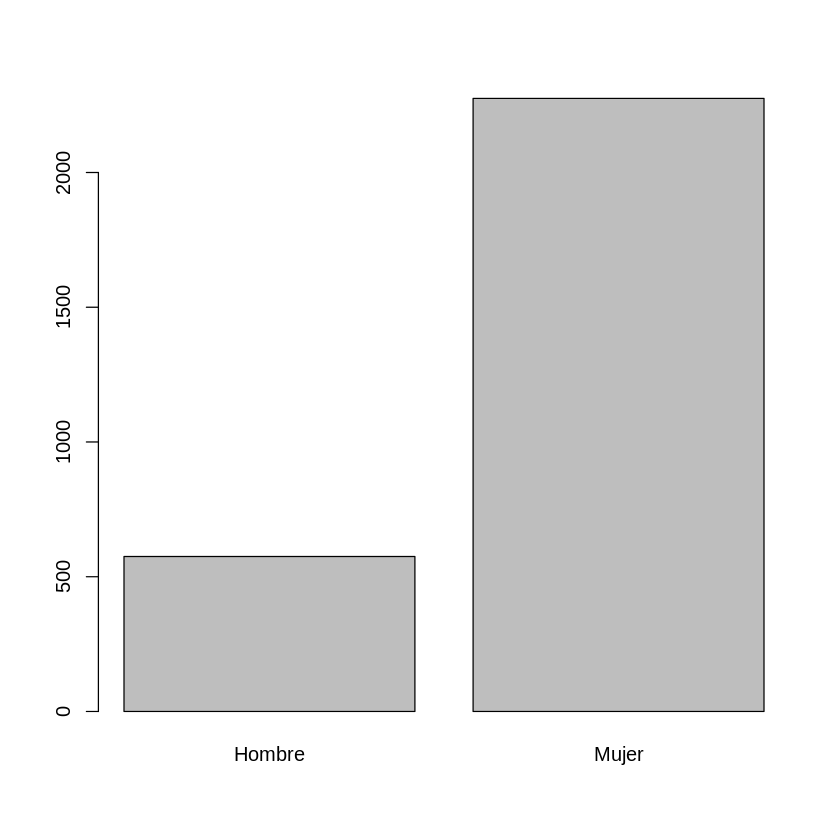

In [ ]:
sexo=factor(sexo, levels = c(0,1),labels = c("Hombre", "Mujer"))
plot(sexo)

# Estudio de caso

Simular una población de 100 personas donde la variable de interés es el sexo y se sabe que el 80% son mujeres.



In [ ]:
sexo=rbinom(100,1,0.8)
sexo

[1] 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 [38] 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 [75] 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0

In [ ]:
sexo=factor(sexo, levels = c(0,1),labels = c("Hombre", "Mujer"))
sexo

[1] Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Hombre Mujer 
 [11] Mujer  Hombre Mujer  Mujer  Hombre Mujer  Mujer  Mujer  Mujer  Mujer 
 [21] Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer 
 [31] Mujer  Mujer  Hombre Mujer  Mujer  Hombre Hombre Mujer  Mujer  Mujer 
 [41] Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Hombre Hombre Mujer  Mujer 
 [51] Mujer  Mujer  Mujer  Hombre Mujer  Mujer  Mujer  Mujer  Mujer  Mujer 
 [61] Mujer  Mujer  Mujer  Mujer  Mujer  Hombre Mujer  Hombre Mujer  Mujer 
 [71] Mujer  Hombre Mujer  Mujer  Mujer  Hombre Mujer  Mujer  Mujer  Mujer 
 [81] Hombre Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer  Mujer 
 [91] Mujer  Mujer  Mujer  Mujer  Hombre Mujer  Mujer  Mujer  Mujer  Hombre
Levels: Hombre Mujer

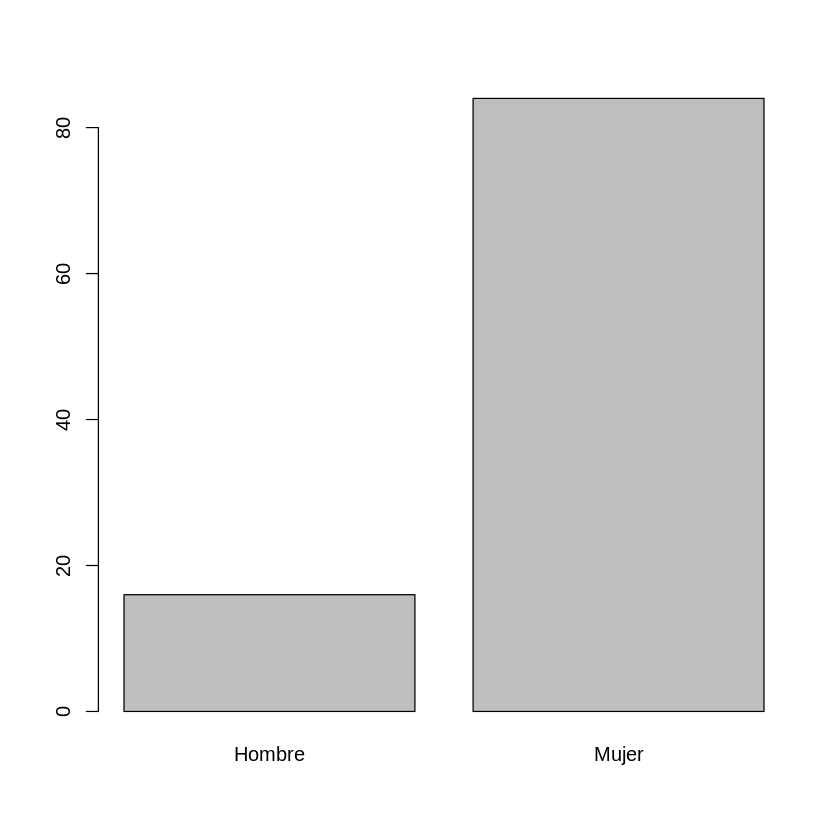

In [ ]:
plot(sexo)

In [ ]:
p=1/6
# La probabilidad de tener x aciertos en 6 lanzamientos
dado=rbinom(10000,6,p)
head(dado)

[1] 2 1 3 0 2 0

In [ ]:
tail(dado)

[1] 3 0 0 0 2 0

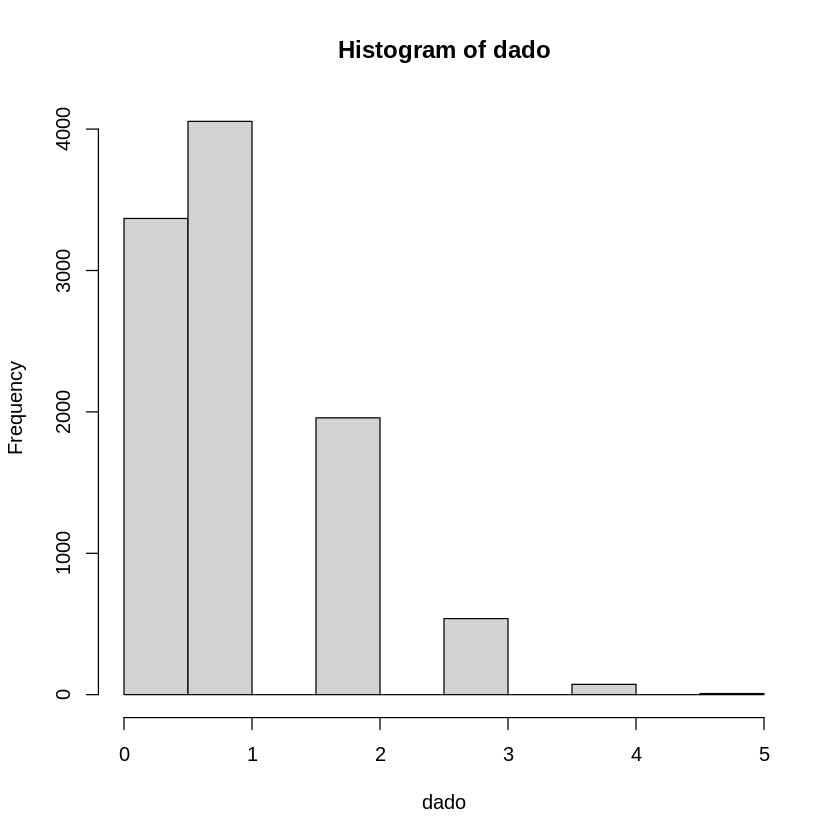

In [ ]:
hist(dado)

# Estudio de caso 2

Simula la distribución de la cantidad de caras que salen al lanzar dos monedas. Suponga que se repite el experimento 30 veces.


In [ ]:
sample(0:2,10,rep=T)

[1] 0 0 1 0 0 1 2 1 0 0

In [ ]:
t<-sapply(1:30, function(x){sum(sample(0:2,1,rep=T))})
t

[1] 0 2 0 1 2 0 2 0 1 2 1 2 2 1 2 0 0 0 2 2 1 2 1 2 1 1 1 0 2 2

In [ ]:
table(t)


t
 0  1  2 
 8  9 13 

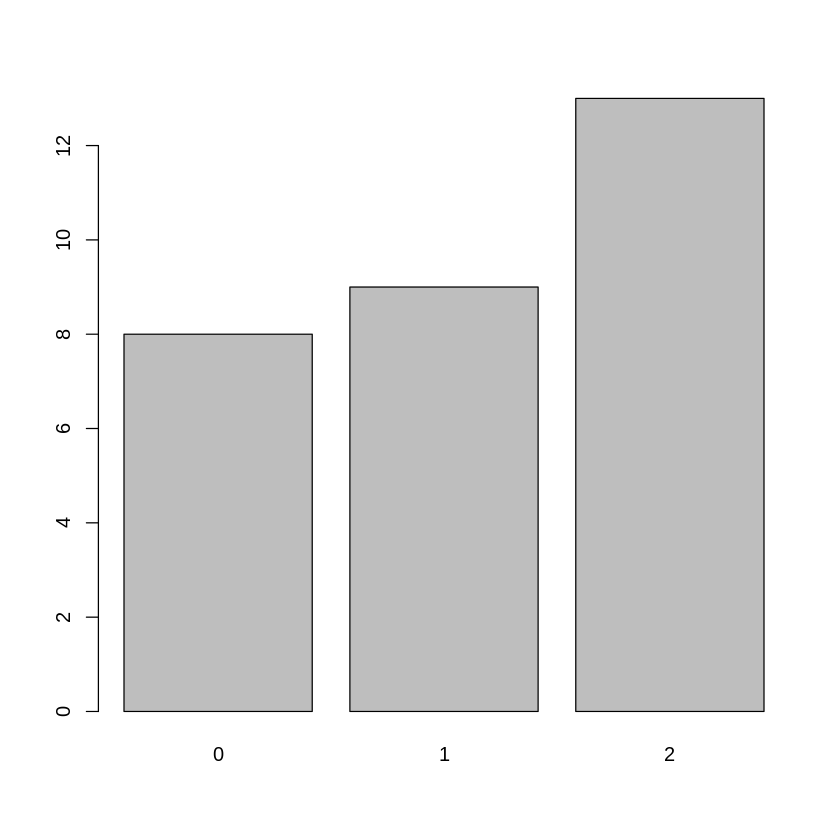

In [ ]:
barplot(table(t))


In [ ]:
# Repite este esperimento 300 veces:

t<-sapply(1:300, function(x){sum(sample(0:5,1,rep=T))})
t

[1] 2 5 1 3 2 5 5 4 5 0 3 5 0 0 2 3 4 5 5 1 3 2 1 4 5 5 1 2 5 5 3 3 2 1 4 1 5
 [38] 3 1 1 0 2 1 1 0 4 1 4 5 1 1 2 3 2 5 4 4 4 3 0 5 0 4 5 5 0 3 5 0 3 3 4 4 4
 [75] 0 4 1 1 0 2 4 1 4 0 1 2 2 2 1 0 5 2 2 5 2 1 3 3 2 5 2 4 1 3 0 3 4 5 4 2 4
[112] 2 2 5 1 2 1 0 5 5 0 3 2 5 1 2 0 2 1 2 0 3 0 1 3 1 0 3 1 4 0 3 4 0 4 4 4 2
[149] 2 1 2 4 0 4 4 0 0 3 3 5 3 0 5 4 4 2 1 4 4 1 1 1 1 0 0 4 2 1 5 1 2 4 0 5 1
[186] 0 4 1 2 5 5 1 4 2 5 0 0 4 1 5 5 2 4 1 3 2 4 2 0 0 4 2 0 4 1 2 4 2 3 1 2 2
[223] 3 2 0 4 3 0 1 5 4 2 2 4 5 4 5 0 5 0 0 5 0 4 0 1 1 4 4 0 0 1 0 5 0 1 2 2 0
[260] 5 0 4 3 2 2 1 5 0 5 2 4 2 4 1 0 0 4 3 0 4 4 0 1 2 4 2 4 2 0 1 3 5 2 1 0 1
[297] 5 3 2 1

In [ ]:
table(t)

t
 0  1  2  3  4  5 
55 54 56 32 57 46 

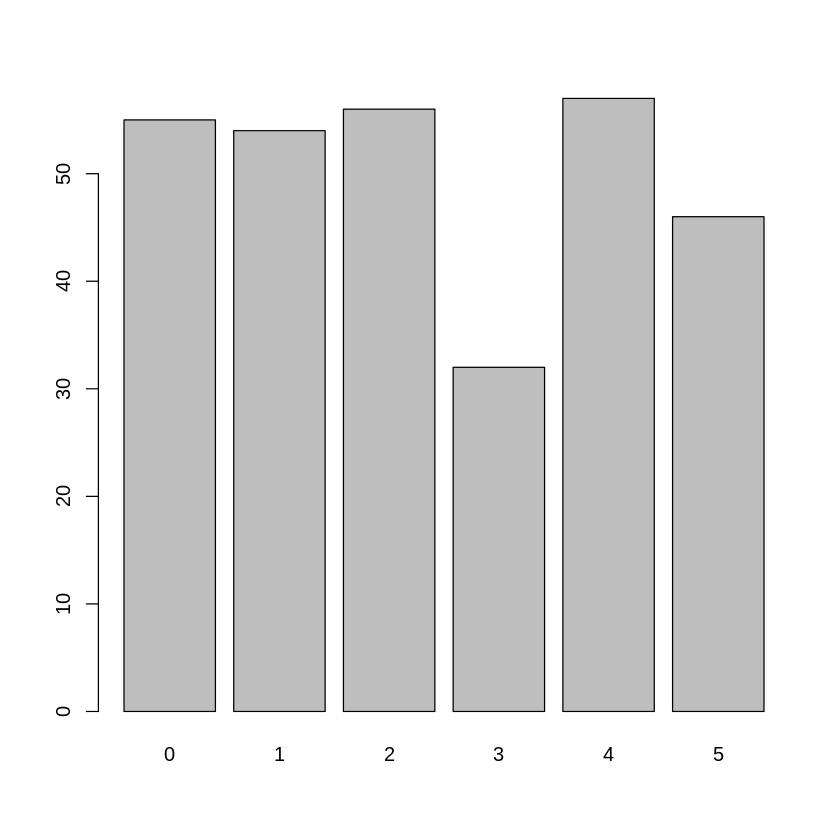

In [ ]:
barplot(table(t))


## Distribución uniforme

In [ ]:
mu10=sample(runif(100,0,1),50,rep=T)
mu10

[1] 0.73018463 0.69518152 0.06417244 0.97308318 0.60037006 0.91338295
 [7] 0.62392108 0.37827684 0.88759335 0.67122294 0.47316784 0.89581980
[13] 0.62392108 0.78985149 0.45842253 0.73906811 0.74782125 0.31394668
[19] 0.86157120 0.62303447 0.25415726 0.64036879 0.00877771 0.21017545
[25] 0.57852174 0.58064419 0.88759335 0.45842253 0.98533233 0.66937310
[31] 0.43251234 0.06417244 0.21017545 0.74533967 0.47316784 0.41079019
[37] 0.24553903 0.25415726 0.38350559 0.09492999 0.38713651 0.16123929
[43] 0.75062842 0.10065170 0.06003576 0.65026980 0.38350559 0.01819533
[49] 0.98645674 0.01819533

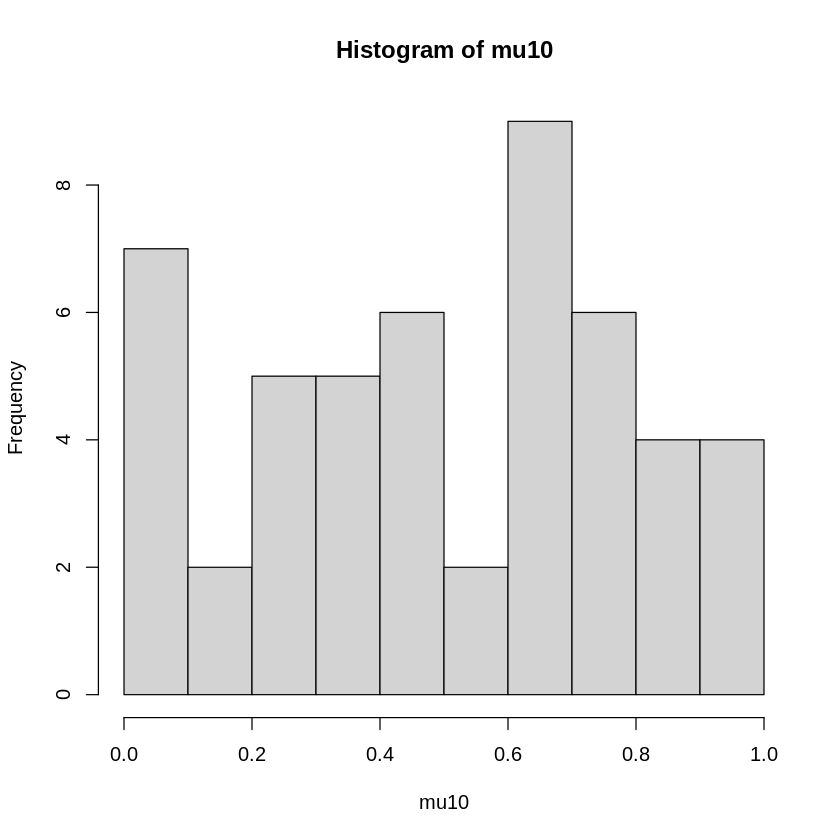

In [ ]:
hist(mu10)


In [ ]:
mu1000=sample(runif(100,0,1),1000,rep=T)
head(mu1000)

[1] 0.280240839 0.839484022 0.293194596 0.672850839 0.516088492 0.002503541

In [ ]:
tail(mu1000)


[1] 0.4143534 0.4813221 0.8260101 0.6728508 0.3448877 0.7350896

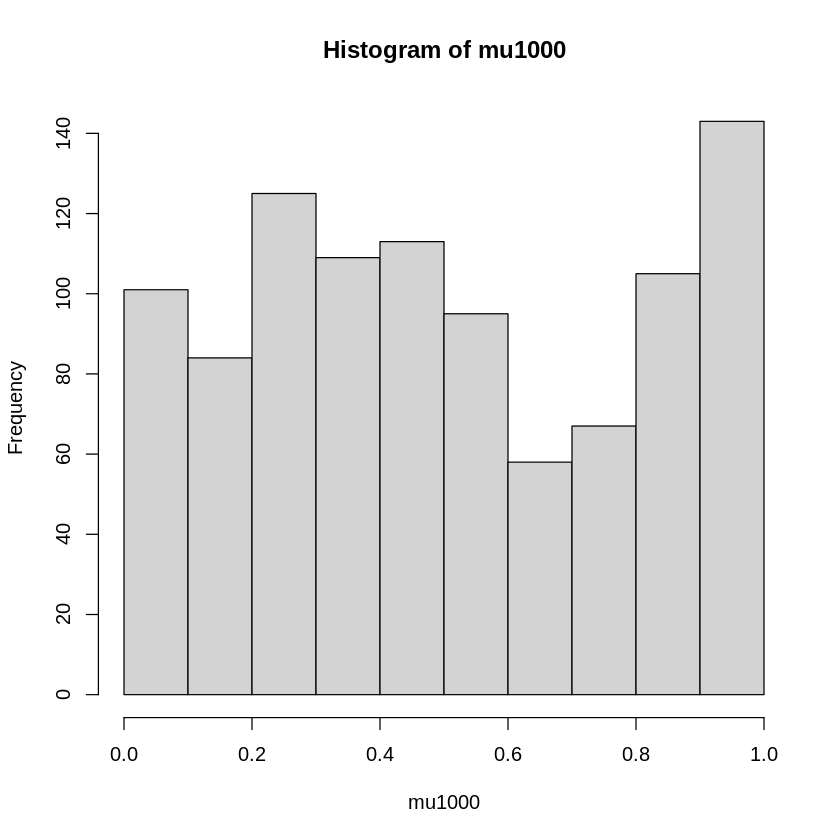

In [ ]:
hist(mu1000)


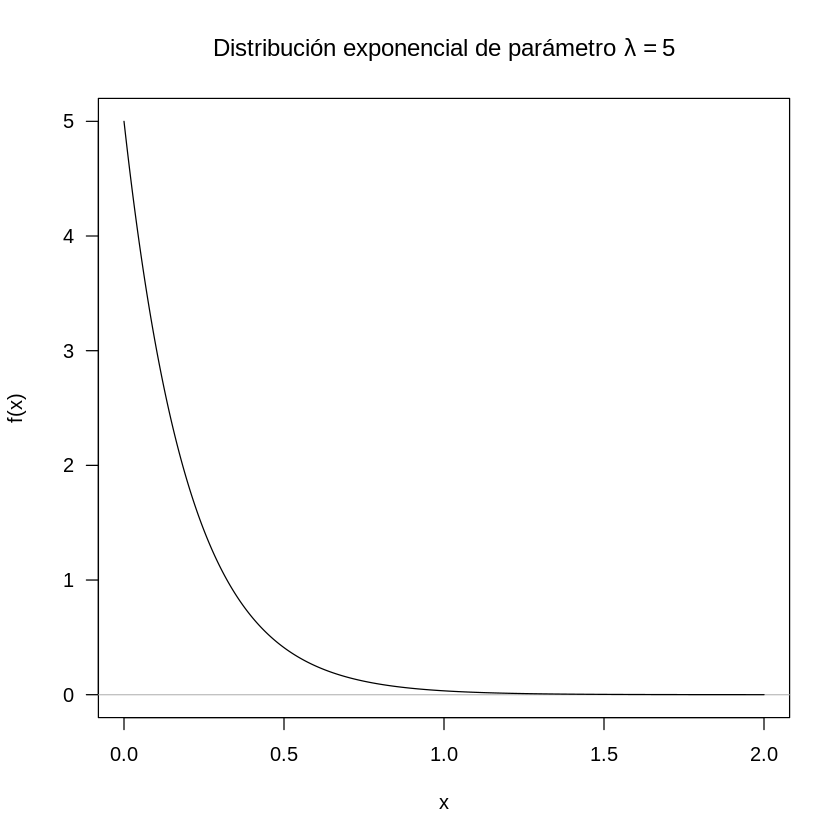

In [ ]:
x <- seq(0, 2, length.out = 1000)
RcmdrMisc::plotDistr(x, dexp(x, rate = 5), ylab="f(x)",
                     main = expression(paste("Distribución exponencial de parámetro ",lambda==5)), las=1)

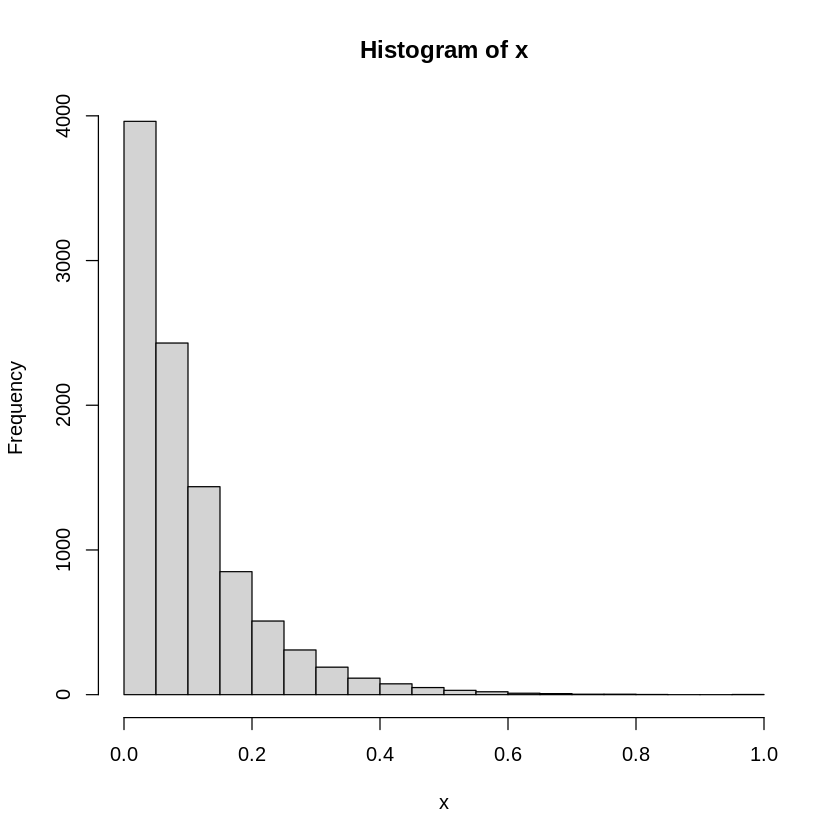

In [ ]:
set.seed(333)
n<-10000
lambda<-10
x<- -log(runif(n,0,1))/lambda
hist(x)

In [ ]:
x <- round(seq(-6, 6, len=100),3)
x

[1] -6.000 -5.879 -5.758 -5.636 -5.515 -5.394 -5.273 -5.152 -5.030 -4.909
 [11] -4.788 -4.667 -4.545 -4.424 -4.303 -4.182 -4.061 -3.939 -3.818 -3.697
 [21] -3.576 -3.455 -3.333 -3.212 -3.091 -2.970 -2.848 -2.727 -2.606 -2.485
 [31] -2.364 -2.242 -2.121 -2.000 -1.879 -1.758 -1.636 -1.515 -1.394 -1.273
 [41] -1.152 -1.030 -0.909 -0.788 -0.667 -0.545 -0.424 -0.303 -0.182 -0.061
 [51]  0.061  0.182  0.303  0.424  0.545  0.667  0.788  0.909  1.030  1.152
 [61]  1.273  1.394  1.515  1.636  1.758  1.879  2.000  2.121  2.242  2.364
 [71]  2.485  2.606  2.727  2.848  2.970  3.091  3.212  3.333  3.455  3.576
 [81]  3.697  3.818  3.939  4.061  4.182  4.303  4.424  4.545  4.667  4.788
 [91]  4.909  5.030  5.152  5.273  5.394  5.515  5.636  5.758  5.879  6.000

In [ ]:
#f1 es la función de densidad para cada valor posible de X, si esta sigue una distribución normal de media 0 y varianza 1
f1=dnorm(x, 0, 1)
f1

[1] 6.075883e-09 1.246602e-08 2.520507e-08 5.050535e-08 9.915803e-08
  [6] 1.918491e-07 3.657912e-07 6.873030e-07 1.279056e-06 2.333645e-06
 [11] 4.195867e-06 7.434472e-06 1.304050e-05 2.243639e-05 3.804111e-05
 [16] 6.356163e-05 1.046594e-04 1.704959e-04 2.726012e-04 4.295197e-04
 [21] 6.669293e-04 1.020512e-03 1.543994e-03 2.294109e-03 3.359111e-03
 [26] 4.847033e-03 6.912039e-03 9.684748e-03 1.337248e-02 1.819604e-02
 [31] 2.439965e-02 3.231510e-02 4.207679e-02 5.399097e-02 6.827176e-02
 [36] 8.507513e-02 1.046445e-01 1.266217e-01 1.509878e-01 1.774258e-01
 [41] 2.054627e-01 2.347138e-01 2.639280e-01 2.924649e-01 3.193770e-01
 [46] 3.438839e-01 3.646466e-01 3.810430e-01 3.923894e-01 3.982007e-01
 [51] 3.982007e-01 3.923894e-01 3.810430e-01 3.646466e-01 3.438839e-01
 [56] 3.193770e-01 2.924649e-01 2.639280e-01 2.347138e-01 2.054627e-01
 [61] 1.774258e-01 1.509878e-01 1.266217e-01 1.046445e-01 8.507513e-02
 [66] 6.827176e-02 5.399097e-02 4.207679e-02 3.231510e-02 2.439965e-02
 [71] 1.819604e-02 1.337248e-02 9.684748e-03 6.912039e-03 4.847033e-03
 [76] 3.359111e-03 2.294109e-03 1.543994e-03 1.020512e-03 6.669293e-04
 [81] 4.295197e-04 2.726012e-04 1.704959e-04 1.046594e-04 6.356163e-05
 [86] 3.804111e-05 2.243639e-05 1.304050e-05 7.434472e-06 4.195867e-06
 [91] 2.333645e-06 1.279056e-06 6.873030e-07 3.657912e-07 1.918491e-07
 [96] 9.915803e-08 5.050535e-08 2.520507e-08 1.246602e-08 6.075883e-09

In [ ]:
y <- cbind(round(f1,3), round(dnorm(x, -2, 1), 3),
           round(dnorm(x, 0, 2), 3), round(dnorm( x, 0, .5),3),
           round(dnorm(x, 2, .3), 3), round(dnorm(x, -.5, 3 ),3))
valores=data.frame(x,y)
head(valores)

,x,X1,X2,X3,X4,X5,X6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-6.000,0,0.000,0.002,0,0,0.025
2,-5.879,0,0.000,0.003,0,0,0.027
3,-5.758,0,0.000,0.003,0,0,0.029
4,-5.636,0,0.001,0.004,0,0,0.031
5,-5.515,0,0.001,0.004,0,0,0.033
6,-5.394,0,0.001,0.005,0,0,0.035


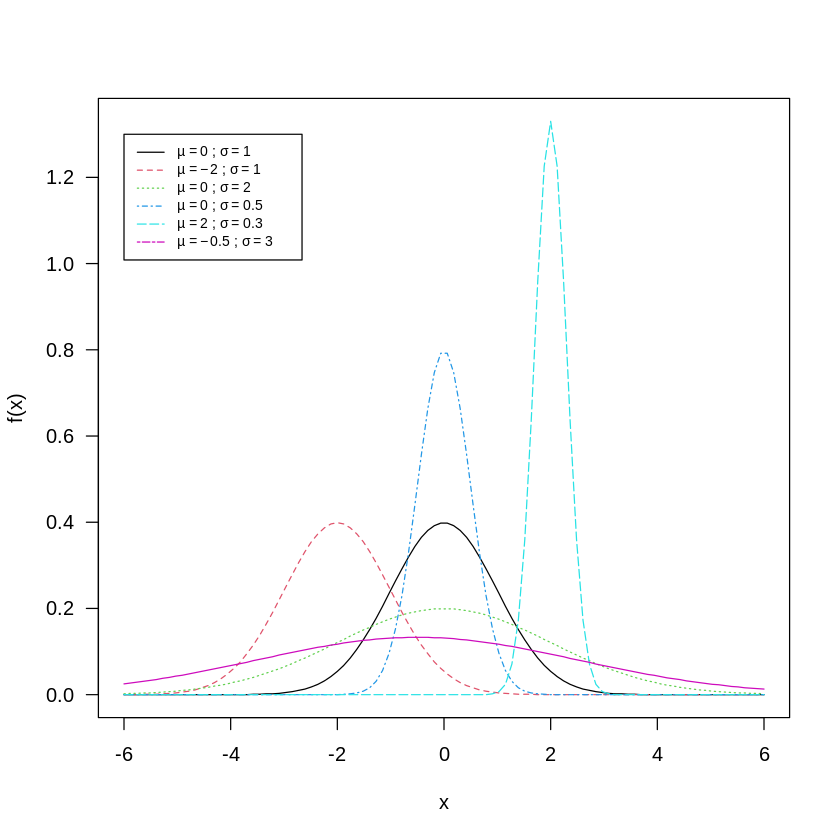

In [ ]:
matplot(x, y, type="l", col=c(1,2,3,4,5,6), las = 1, ylab = "f(x)")
legend(-6, 1.3, expression(paste(mu==0," ; ", sigma==1),
                           paste(mu==-2," ; ", sigma==1),
                           paste(mu==0," ; ", sigma==2),
                           paste(mu==0," ; ", sigma==0.5),
                           paste(mu==2," ; ", sigma==0.3),
                           paste(mu==-0.5," ; ", sigma==3)),
       lty = 1:6, cex = 0.7, col=c(1,2,3,4,5,6))

In [ ]:
# la probabilidad de que una variable aleatoria normal estándar tenga un valor menor a 1.5
pbb=pnorm(1.5,mean=0,sd=1)
pbb

[1] 0.9331928

In [ ]:
#install.packages("RcmdrMisc")
library(RcmdrMisc)

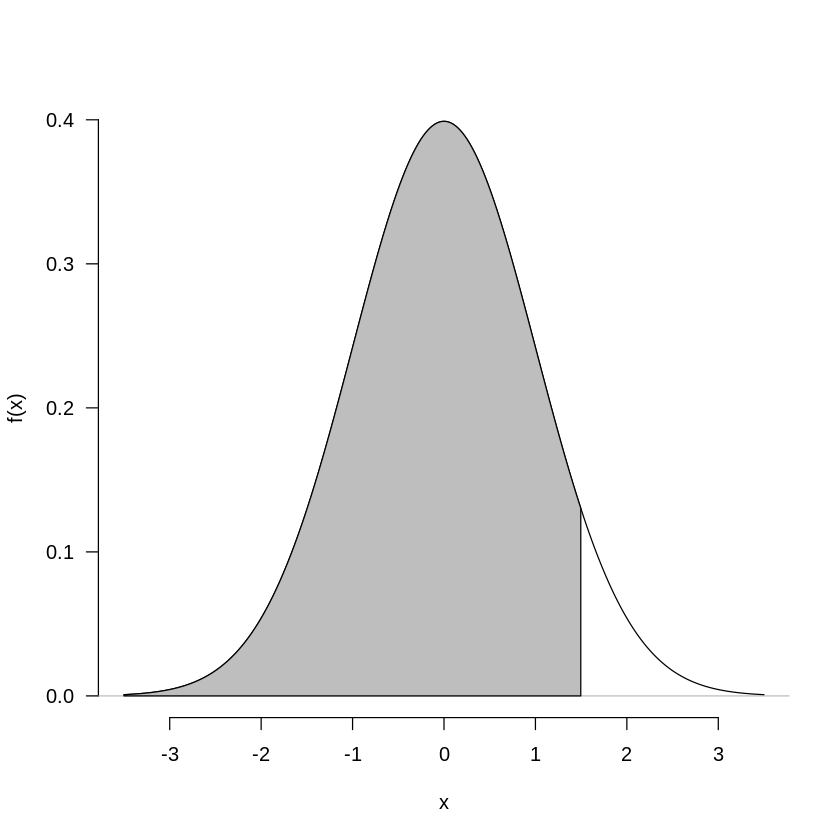

In [ ]:
x <- seq(-3.5, 3.5, length.out = 1000)
RcmdrMisc::plotDistr(x,dnorm(x,0,1),
                     regions = list(c(-3.5,1.5)),
                     legend = F, bty = "n", las = 1,
                     xlab="x", ylab="f(x)")

In [ ]:
# la probabilidad de que una variable aleatoria normal de media 20 y desvío estándar 2 tenga un valor mayor a 18 y menor 21
area=pnorm(21,20,2)-pnorm(18,20,2)
area

[1] 0.5328072

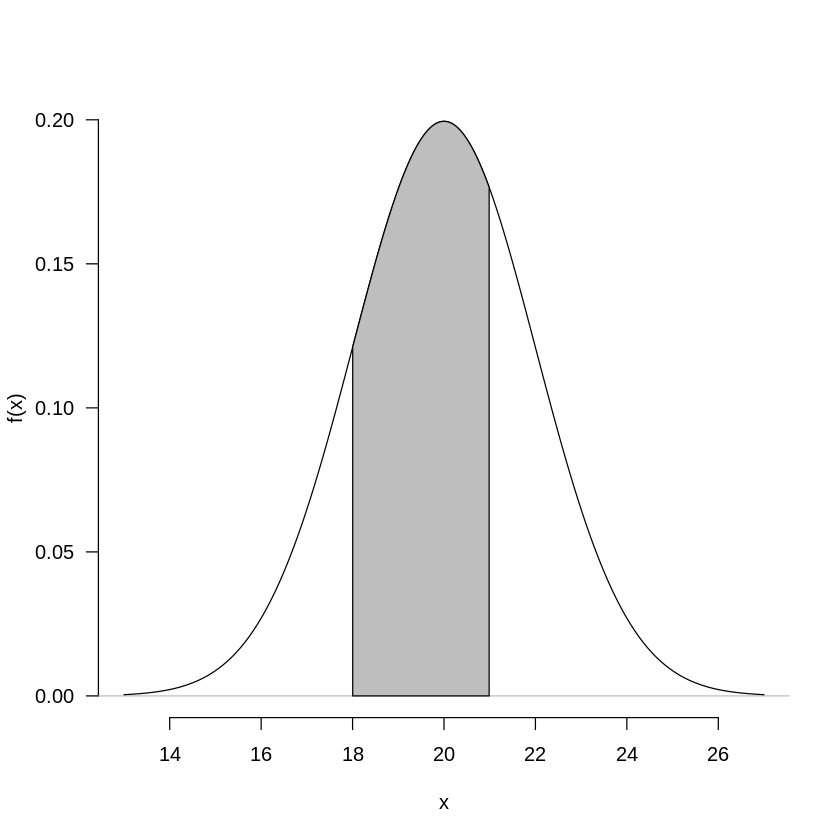

In [ ]:
x <- seq(13, 27, length.out = 1000)
RcmdrMisc::plotDistr(x,dnorm(x,20,2),
                     regions = list(c(18, 21)),
                     legend = F, bty = "n", las = 1,
                     xlab="x", ylab="f(x)")

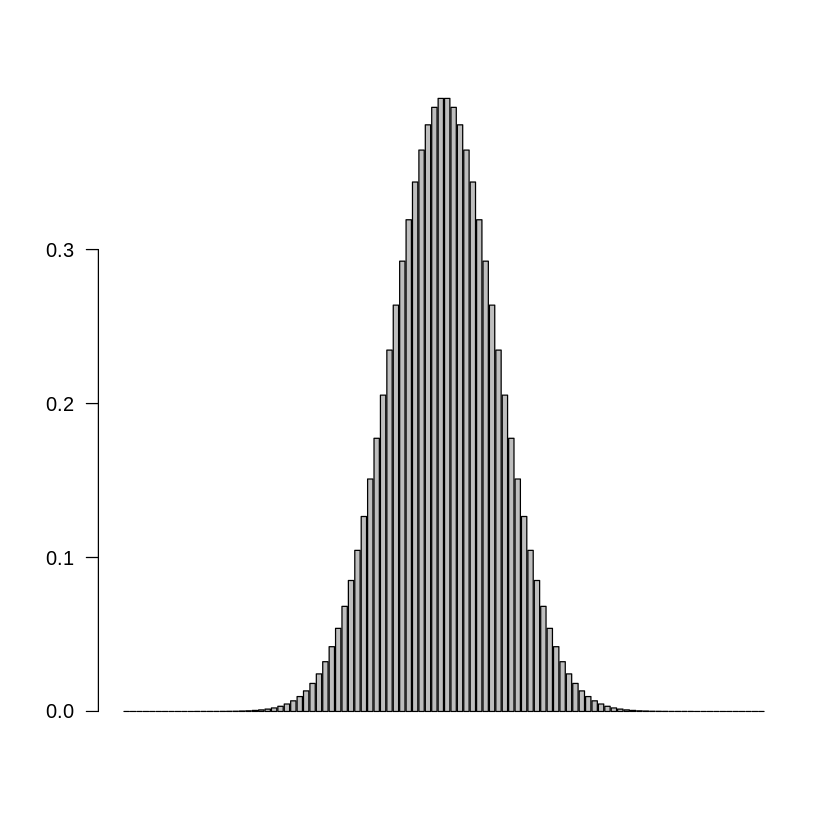

In [ ]:
# Gráfica de la función f1
barplot(f1, las=1)

In [ ]:
q=round(seq(-4,4,length=100),3)
q

[1] -4.000 -3.919 -3.838 -3.758 -3.677 -3.596 -3.515 -3.434 -3.354 -3.273
 [11] -3.192 -3.111 -3.030 -2.949 -2.869 -2.788 -2.707 -2.626 -2.545 -2.465
 [21] -2.384 -2.303 -2.222 -2.141 -2.061 -1.980 -1.899 -1.818 -1.737 -1.657
 [31] -1.576 -1.495 -1.414 -1.333 -1.253 -1.172 -1.091 -1.010 -0.929 -0.848
 [41] -0.768 -0.687 -0.606 -0.525 -0.444 -0.364 -0.283 -0.202 -0.121 -0.040
 [51]  0.040  0.121  0.202  0.283  0.364  0.444  0.525  0.606  0.687  0.768
 [61]  0.848  0.929  1.010  1.091  1.172  1.253  1.333  1.414  1.495  1.576
 [71]  1.657  1.737  1.818  1.899  1.980  2.061  2.141  2.222  2.303  2.384
 [81]  2.465  2.545  2.626  2.707  2.788  2.869  2.949  3.030  3.111  3.192
 [91]  3.273  3.354  3.434  3.515  3.596  3.677  3.758  3.838  3.919  4.000

In [ ]:
pbb1=round(pnorm(q,0,1),3)
pbb1

[1] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.001
 [13] 0.001 0.002 0.002 0.003 0.003 0.004 0.005 0.007 0.009 0.011 0.013 0.016
 [25] 0.020 0.024 0.029 0.035 0.041 0.049 0.058 0.067 0.079 0.091 0.105 0.121
 [37] 0.138 0.156 0.176 0.198 0.221 0.246 0.272 0.300 0.329 0.358 0.389 0.420
 [49] 0.452 0.484 0.516 0.548 0.580 0.611 0.642 0.671 0.700 0.728 0.754 0.779
 [61] 0.802 0.824 0.844 0.862 0.879 0.895 0.909 0.921 0.933 0.942 0.951 0.959
 [73] 0.965 0.971 0.976 0.980 0.984 0.987 0.989 0.991 0.993 0.995 0.996 0.997
 [85] 0.997 0.998 0.998 0.999 0.999 0.999 0.999 1.000 1.000 1.000 1.000 1.000
 [97] 1.000 1.000 1.000 1.000

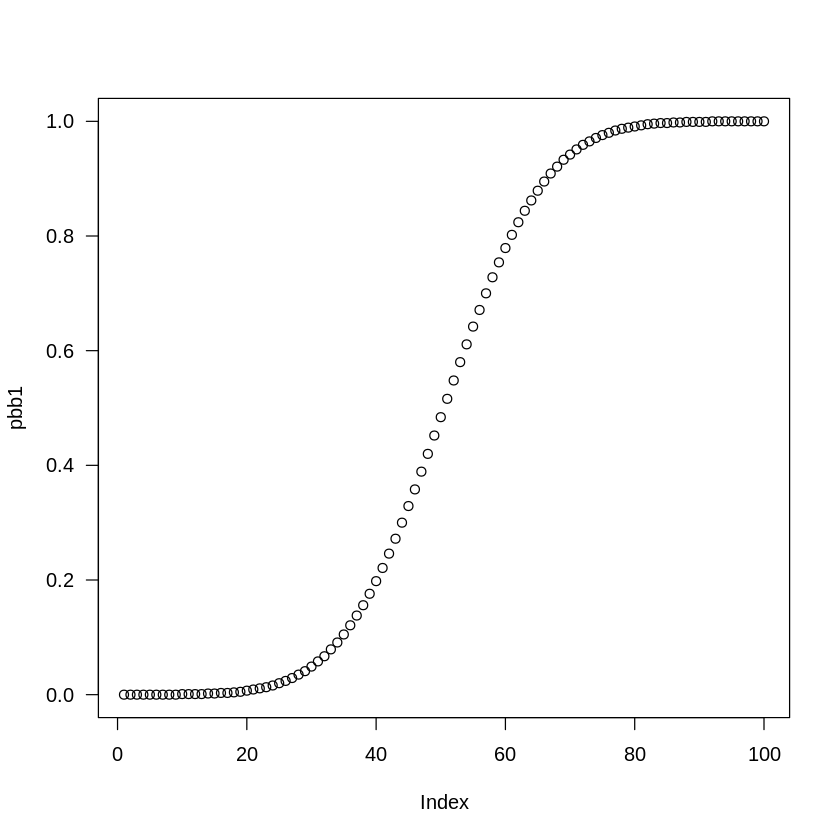

In [ ]:
plot(pbb1, las=1)

In [ ]:
#Funcion de densidad
dens1=dnorm(q,0,1)
dens1

[1] 0.0001338302 0.0001844340 0.0002525098 0.0003421640 0.0004623895
  [6] 0.0006207721 0.0008279556 0.0010970653 0.0014393027 0.0018824088
 [11] 0.0024458305 0.0031571075 0.0040485822 0.0051578315 0.0065093281
 [16] 0.0081853400 0.0102255782 0.0126908181 0.0156473918 0.0191194138
 [21] 0.0232682262 0.0281321274 0.0337903327 0.0403211541 0.0477011853
 [26] 0.0561831419 0.0657405705 0.0764207874 0.0882551672 0.1010880830
 [31] 0.1152298404 0.1304909983 0.1468069922 0.1640829751 0.1819646151
 [36] 0.2007428520 0.2200107141 0.2395510977 0.2591212881 0.2784573054
 [41] 0.2970512687 0.3150817868 0.3320211746 0.3475832643 0.3614951936
 [46] 0.3733695746 0.3832824734 0.3908855264 0.3960324870 0.3986232542
 [51] 0.3986232542 0.3960324870 0.3908855264 0.3832824734 0.3733695746
 [56] 0.3614951936 0.3475832643 0.3320211746 0.3150817868 0.2970512687
 [61] 0.2784573054 0.2591212881 0.2395510977 0.2200107141 0.2007428520
 [66] 0.1819646151 0.1640829751 0.1468069922 0.1304909983 0.1152298404
 [71] 0.1010880830 0.0882551672 0.0764207874 0.0657405705 0.0561831419
 [76] 0.0477011853 0.0403211541 0.0337903327 0.0281321274 0.0232682262
 [81] 0.0191194138 0.0156473918 0.0126908181 0.0102255782 0.0081853400
 [86] 0.0065093281 0.0051578315 0.0040485822 0.0031571075 0.0024458305
 [91] 0.0018824088 0.0014393027 0.0010970653 0.0008279556 0.0006207721
 [96] 0.0004623895 0.0003421640 0.0002525098 0.0001844340 0.0001338302

In [ ]:
tablaZ=data.frame(q,pbb1,dens1)
tablaZ

q,pbb1,dens1
<dbl>,<dbl>,<dbl>
-4.000,0.000,0.0001338302
-3.919,0.000,0.0001844340
-3.838,0.000,0.0002525098
-3.758,0.000,0.0003421640
-3.677,0.000,0.0004623895
-3.596,0.000,0.0006207721
-3.515,0.000,0.0008279556
-3.434,0.000,0.0010970653
-3.354,0.000,0.0014393027


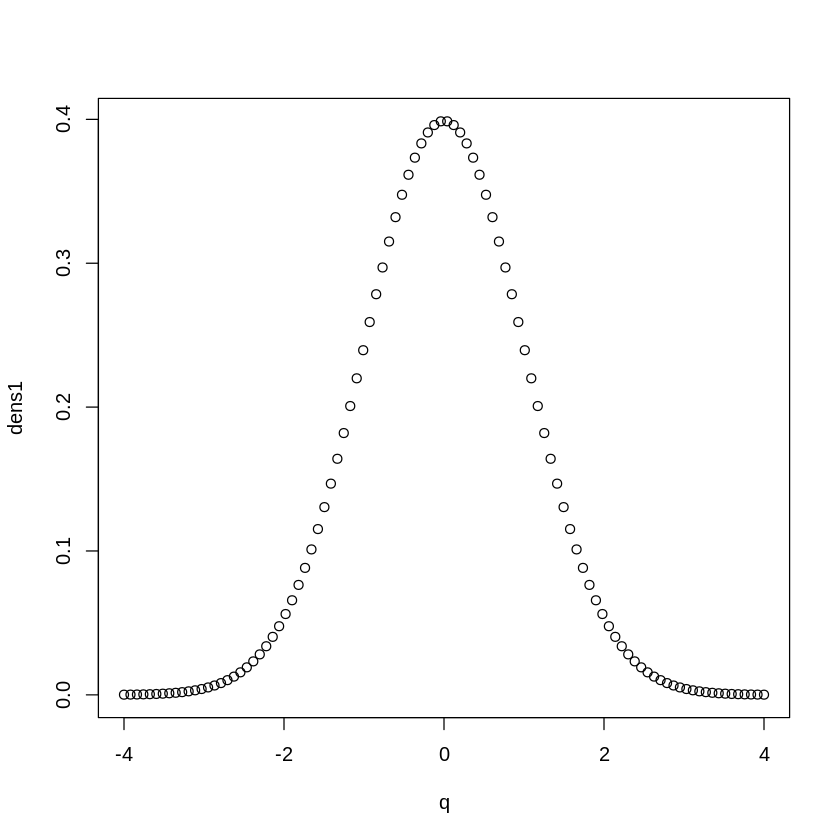

In [ ]:
curvagauss=plot(data.frame(q,dens1))

In [ ]:
u5<-sapply(1:300, function(x){mean(sample(runif(10000),5,rep=F))})
round(u5, 3)

[1] 0.757 0.508 0.284 0.673 0.520 0.662 0.639 0.481 0.235 0.391 0.368 0.423
 [13] 0.413 0.400 0.349 0.497 0.450 0.268 0.434 0.536 0.142 0.340 0.468 0.244
 [25] 0.475 0.277 0.445 0.514 0.430 0.767 0.363 0.356 0.560 0.386 0.552 0.381
 [37] 0.481 0.214 0.529 0.486 0.501 0.469 0.233 0.426 0.614 0.390 0.269 0.358
 [49] 0.571 0.443 0.344 0.678 0.420 0.677 0.485 0.351 0.402 0.804 0.605 0.391
 [61] 0.412 0.342 0.605 0.534 0.434 0.692 0.512 0.747 0.480 0.437 0.670 0.603
 [73] 0.546 0.399 0.368 0.473 0.580 0.297 0.664 0.340 0.539 0.677 0.541 0.428
 [85] 0.507 0.518 0.371 0.583 0.503 0.194 0.384 0.381 0.668 0.564 0.762 0.608
 [97] 0.444 0.304 0.315 0.592 0.347 0.647 0.446 0.489 0.598 0.551 0.555 0.705
[109] 0.699 0.505 0.289 0.688 0.468 0.400 0.413 0.556 0.605 0.585 0.875 0.476
[121] 0.599 0.618 0.735 0.482 0.498 0.436 0.667 0.216 0.696 0.476 0.487 0.666
[133] 0.390 0.628 0.517 0.318 0.305 0.235 0.799 0.486 0.633 0.545 0.706 0.430
[145] 0.589 0.368 0.311 0.352 0.677 0.584 0.607 0.618 0.546 0.580 0.617 0.280
[157] 0.464 0.801 0.344 0.298 0.638 0.530 0.471 0.347 0.389 0.703 0.544 0.476
[169] 0.542 0.520 0.409 0.664 0.429 0.491 0.471 0.497 0.358 0.586 0.725 0.541
[181] 0.607 0.490 0.573 0.622 0.605 0.521 0.393 0.633 0.426 0.450 0.425 0.503
[193] 0.637 0.693 0.603 0.599 0.520 0.752 0.335 0.493 0.368 0.383 0.393 0.571
[205] 0.510 0.642 0.580 0.613 0.604 0.525 0.295 0.300 0.538 0.388 0.520 0.452
[217] 0.460 0.668 0.654 0.295 0.548 0.459 0.516 0.662 0.483 0.468 0.623 0.467
[229] 0.382 0.584 0.313 0.573 0.470 0.552 0.605 0.475 0.545 0.799 0.285 0.334
[241] 0.425 0.336 0.491 0.577 0.483 0.426 0.504 0.695 0.613 0.602 0.584 0.521
[253] 0.470 0.468 0.473 0.581 0.347 0.720 0.447 0.462 0.650 0.511 0.606 0.464
[265] 0.575 0.342 0.277 0.431 0.452 0.567 0.458 0.421 0.254 0.651 0.498 0.606
[277] 0.835 0.641 0.445 0.783 0.377 0.460 0.555 0.445 0.509 0.567 0.529 0.370
[289] 0.269 0.560 0.478 0.685 0.431 0.477 0.604 0.662 0.680 0.660 0.499 0.557

In [ ]:
u100<-sapply(1:300, function(x){mean(sample(runif(10000),100,rep=F))})
round(u100, 3)

[1] 0.483 0.510 0.418 0.514 0.540 0.523 0.459 0.506 0.490 0.539 0.431 0.502
 [13] 0.529 0.502 0.519 0.508 0.432 0.456 0.480 0.504 0.452 0.476 0.460 0.494
 [25] 0.475 0.564 0.521 0.498 0.473 0.509 0.475 0.513 0.448 0.433 0.512 0.473
 [37] 0.510 0.527 0.524 0.471 0.525 0.505 0.469 0.469 0.527 0.510 0.517 0.499
 [49] 0.521 0.466 0.462 0.516 0.493 0.490 0.490 0.513 0.463 0.505 0.498 0.487
 [61] 0.530 0.548 0.557 0.476 0.500 0.501 0.500 0.512 0.476 0.527 0.540 0.485
 [73] 0.497 0.478 0.498 0.547 0.504 0.478 0.487 0.538 0.493 0.516 0.510 0.530
 [85] 0.521 0.448 0.476 0.516 0.528 0.540 0.483 0.529 0.516 0.466 0.520 0.463
 [97] 0.466 0.488 0.471 0.449 0.507 0.491 0.456 0.426 0.501 0.508 0.484 0.533
[109] 0.505 0.464 0.487 0.469 0.523 0.452 0.533 0.537 0.478 0.488 0.554 0.482
[121] 0.467 0.542 0.523 0.511 0.457 0.450 0.482 0.530 0.485 0.488 0.523 0.512
[133] 0.523 0.498 0.514 0.520 0.496 0.500 0.547 0.465 0.553 0.447 0.489 0.493
[145] 0.553 0.464 0.484 0.581 0.502 0.583 0.454 0.498 0.490 0.510 0.550 0.509
[157] 0.490 0.533 0.487 0.486 0.533 0.509 0.441 0.455 0.474 0.472 0.554 0.447
[169] 0.477 0.513 0.535 0.516 0.512 0.476 0.488 0.463 0.467 0.535 0.532 0.535
[181] 0.447 0.497 0.540 0.486 0.498 0.464 0.475 0.457 0.471 0.529 0.494 0.453
[193] 0.484 0.579 0.473 0.493 0.513 0.533 0.528 0.518 0.513 0.553 0.504 0.477
[205] 0.531 0.460 0.528 0.474 0.535 0.504 0.475 0.507 0.487 0.477 0.517 0.487
[217] 0.534 0.528 0.473 0.482 0.528 0.490 0.535 0.444 0.546 0.489 0.463 0.473
[229] 0.484 0.460 0.460 0.482 0.500 0.489 0.476 0.511 0.455 0.515 0.502 0.509
[241] 0.513 0.520 0.473 0.465 0.457 0.525 0.445 0.448 0.527 0.506 0.467 0.485
[253] 0.501 0.504 0.491 0.537 0.502 0.548 0.454 0.477 0.519 0.534 0.478 0.506
[265] 0.510 0.514 0.504 0.534 0.489 0.504 0.461 0.494 0.534 0.484 0.498 0.488
[277] 0.531 0.502 0.524 0.456 0.482 0.525 0.488 0.471 0.472 0.491 0.477 0.508
[289] 0.511 0.439 0.483 0.442 0.516 0.483 0.498 0.543 0.492 0.422 0.531 0.446

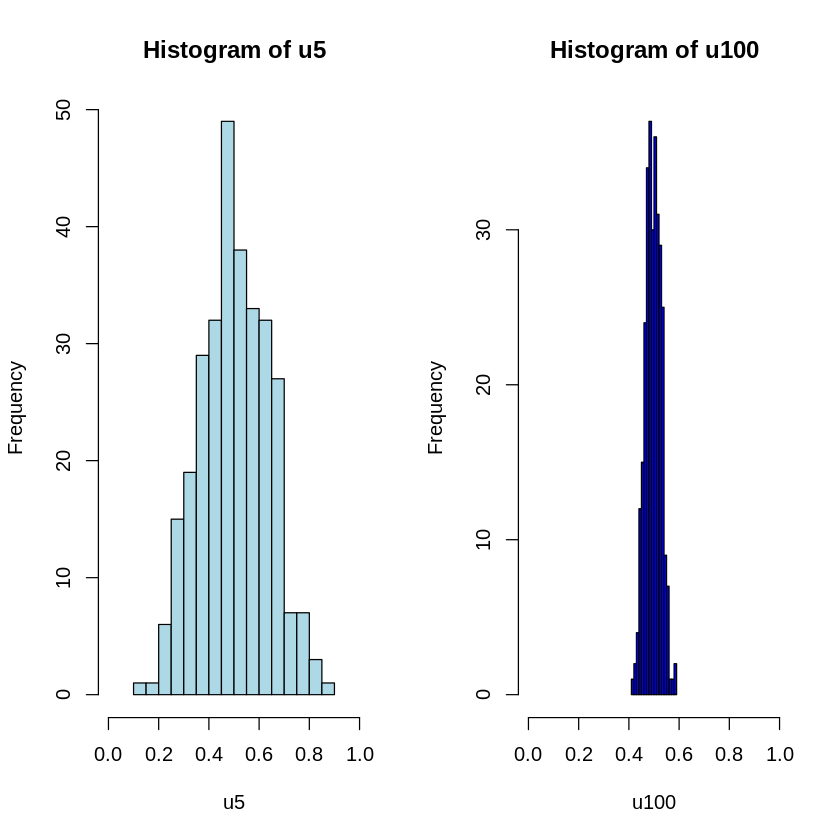

In [ ]:
par(mfrow=c(1,2))
hist(u5,col = "lightblue", breaks=20, freq = TRUE, xlim=c(0,1))
hist(u100,col = "blue", breaks=20, freq = TRUE, xlim=c(0,1))

In [ ]:
#media y varianza de la distribución uniforme con parámetros a=0 y b=1
n=100
a=0
b=1
munif=(a+b)/2
munif

[1] 0.5

In [ ]:
varunif=(b-a)^2/12
varunif

[1] 0.08333333

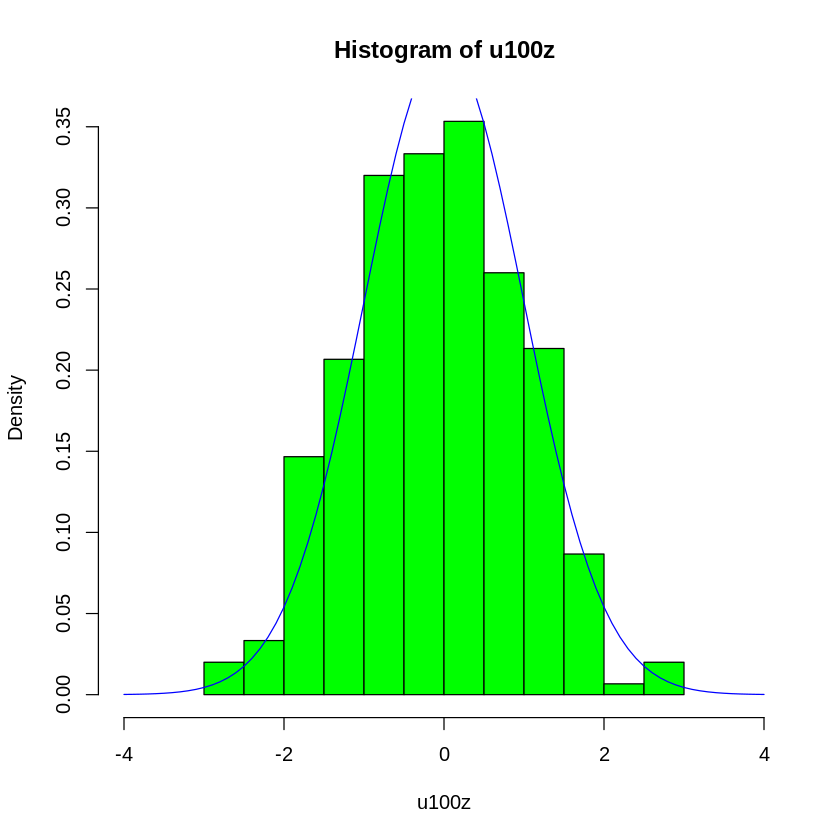

In [ ]:
u100z=(u100-munif)/(sqrt(varunif)/sqrt(n))
hist(u100z,col = "green", breaks=10, freq = F, xlim=c(-4,4))
lines(seq(-4, 4, by=.1), dnorm(seq(-4, 4, by=.1),0, 1), col="blue")

In [ ]:
p5<-sapply(1:300, function(x){mean(sample(rpois(10000,2),5,rep=F))})
p5

[1] 1.4 1.8 2.4 1.4 2.6 1.6 3.0 1.8 1.6 1.6 1.0 2.8 0.8 1.8 2.2 2.0 2.0 3.0
 [19] 1.4 2.4 1.6 2.4 1.6 2.2 2.2 3.0 2.4 1.0 1.2 1.8 1.8 2.8 2.6 1.6 1.2 2.8
 [37] 1.2 1.8 2.4 2.2 2.0 2.2 2.6 2.2 2.8 3.0 1.4 1.8 2.0 2.0 1.6 1.0 2.4 2.0
 [55] 1.6 1.6 0.8 2.2 1.2 1.6 2.6 2.4 1.2 1.0 2.2 1.6 1.8 2.2 1.6 1.0 2.4 3.0
 [73] 3.2 1.2 2.4 2.0 2.0 2.0 4.0 1.2 2.4 2.2 1.2 2.2 2.4 1.4 3.0 2.2 2.0 3.4
 [91] 2.0 2.4 1.8 1.8 2.2 1.6 2.0 2.2 2.2 1.2 1.2 3.6 1.8 1.6 2.2 2.4 1.6 2.6
[109] 1.8 2.2 2.4 1.8 2.4 1.4 0.4 1.6 2.0 3.0 1.8 1.2 2.0 2.8 1.4 2.8 1.4 1.8
[127] 1.2 3.2 2.0 2.6 2.6 1.8 2.4 2.0 1.2 0.6 3.0 1.8 1.0 1.4 1.8 2.2 2.0 2.4
[145] 2.0 2.0 2.0 1.8 2.0 1.8 2.2 1.8 1.6 2.4 2.0 2.2 1.4 2.4 1.8 2.0 1.0 2.0
[163] 3.2 1.2 3.0 3.0 1.6 1.6 2.2 2.8 2.2 2.6 3.0 2.4 1.6 2.4 1.6 2.0 1.6 1.4
[181] 1.4 1.2 1.0 2.4 3.8 3.0 3.4 3.0 1.2 1.8 1.0 2.8 2.2 2.0 2.8 2.2 2.2 2.6
[199] 1.6 2.2 2.8 1.2 1.8 3.4 2.0 1.4 1.8 2.0 2.8 1.4 2.4 1.4 1.2 2.6 2.8 1.8
[217] 1.8 1.2 2.2 2.6 2.6 2.2 1.2 2.4 1.4 0.8 3.0 1.2 1.4 1.4 1.2 1.4 1.8 0.6
[235] 1.4 1.6 2.2 1.2 2.0 2.4 2.4 1.4 0.8 2.0 2.4 1.8 1.4 2.2 2.4 2.4 2.6 1.6
[253] 1.8 1.6 3.0 2.4 1.8 2.0 1.6 1.8 1.4 2.4 1.8 2.4 1.4 2.4 1.2 2.4 1.8 2.2
[271] 2.0 1.0 2.8 2.8 4.2 2.2 2.4 1.6 1.0 1.8 0.6 3.0 1.6 2.8 1.8 1.8 2.2 1.2
[289] 3.2 2.0 1.4 2.8 1.8 2.6 2.0 1.6 2.2 2.6 1.4 1.8

In [ ]:
p100<-sapply(1:300, function(x){mean(sample(rpois(10000,2),100,rep=F))})
p100

[1] 2.03 2.11 1.81 1.80 1.95 2.21 2.35 2.03 2.25 1.89 1.78 2.05 2.04 2.07 1.95
 [16] 1.89 2.18 2.18 1.99 1.98 1.97 1.95 1.96 2.00 1.93 2.07 2.20 1.95 1.73 1.93
 [31] 2.26 2.04 1.99 2.00 2.20 2.01 1.84 2.12 2.01 2.00 1.82 2.01 2.08 1.93 2.09
 [46] 2.11 1.72 1.94 2.11 1.77 2.07 1.77 1.89 2.11 1.95 2.11 1.95 2.01 2.01 2.05
 [61] 1.91 2.17 2.02 2.01 2.11 2.05 2.25 1.87 1.98 2.13 1.98 2.06 2.10 1.87 1.89
 [76] 2.02 2.10 2.04 2.18 1.65 2.22 2.06 1.96 1.96 1.97 1.96 2.04 1.69 2.20 1.99
 [91] 1.97 2.16 1.96 2.01 1.85 1.95 1.91 1.82 2.13 1.96 1.94 2.02 2.09 2.08 1.91
[106] 2.15 1.98 2.11 2.19 2.11 2.01 1.95 1.73 2.01 2.00 2.01 2.06 1.87 1.95 1.87
[121] 2.08 2.25 1.99 1.99 1.82 2.06 2.03 1.96 1.99 2.13 2.33 2.09 2.16 2.00 2.16
[136] 2.16 1.96 2.03 1.91 1.84 1.91 1.90 2.19 2.08 2.11 1.92 2.00 1.97 2.20 2.07
[151] 1.78 2.22 2.06 1.98 2.22 1.92 2.05 1.90 1.96 1.96 2.11 1.84 1.84 2.04 2.03
[166] 2.05 1.92 2.18 1.77 1.85 1.84 1.74 1.94 2.03 2.05 1.96 2.15 2.00 1.79 1.86
[181] 2.18 2.04 1.82 2.04 1.95 1.74 2.23 1.89 2.01 2.01 2.03 2.03 1.96 1.82 2.02
[196] 1.84 2.18 1.99 1.87 2.00 2.08 1.87 2.17 2.03 1.93 1.96 1.78 1.99 2.26 1.81
[211] 2.14 1.85 1.83 1.76 2.02 2.17 2.31 2.10 1.99 2.22 2.17 1.95 2.04 1.67 1.84
[226] 2.10 1.98 2.15 2.08 2.11 1.94 1.90 2.22 1.93 1.77 1.94 1.97 1.98 2.01 2.06
[241] 1.75 2.19 1.86 2.10 2.04 1.92 1.98 1.86 2.16 1.95 2.02 2.20 1.78 1.96 2.19
[256] 2.02 1.93 1.81 1.87 2.08 2.00 1.83 1.98 1.84 2.00 2.04 2.13 1.99 1.94 1.95
[271] 2.05 1.85 2.08 2.04 1.92 1.94 2.01 2.09 2.05 2.09 1.95 1.95 1.70 1.96 2.16
[286] 2.02 1.98 1.89 1.88 1.73 1.90 2.03 2.17 2.06 2.19 1.97 1.94 1.98 1.88 2.23

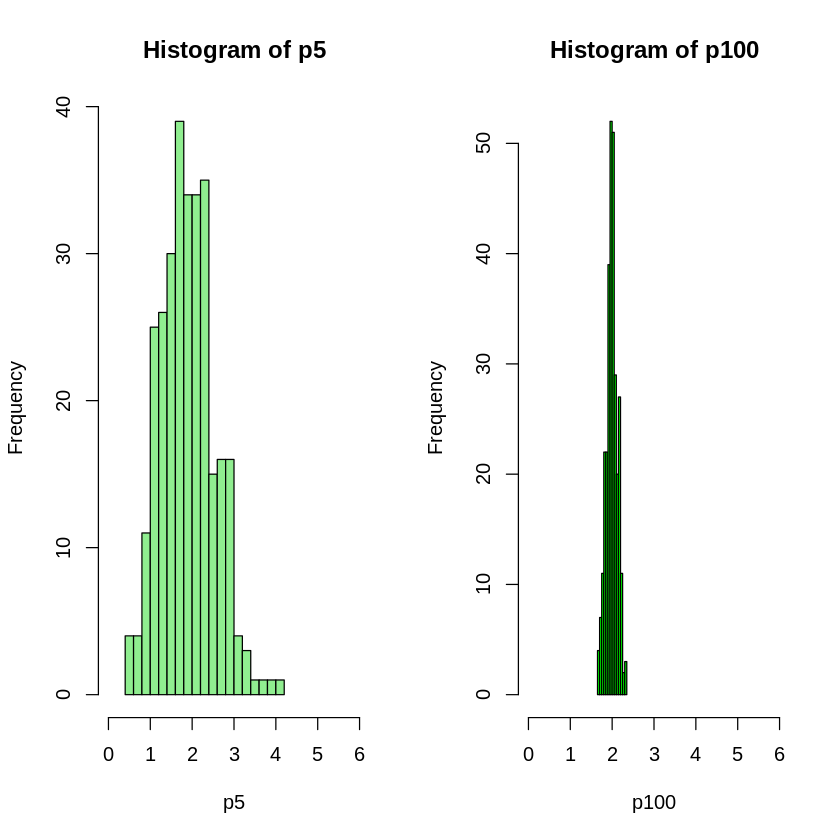

In [ ]:
par(mfrow=c(1,2))
hist(p5,col = "lightgreen", breaks=20, freq = TRUE, xlim=c(0,6))
hist(p100,col = "green", breaks=20, freq = TRUE, xlim=c(0,6))

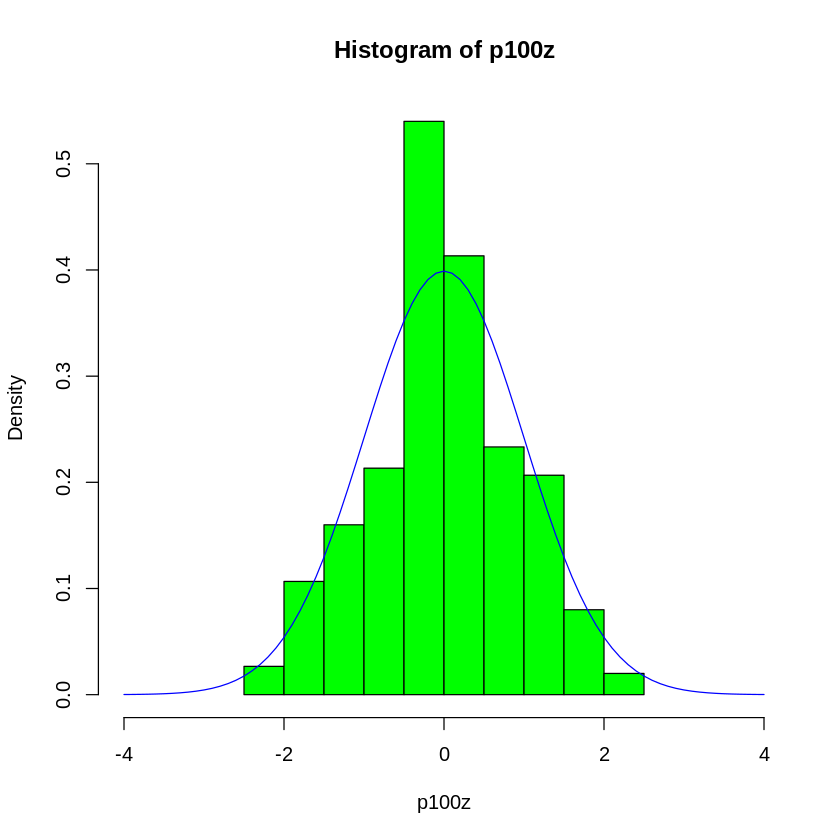

In [ ]:
p100z=(p100-2)/(sqrt(2)/sqrt(100))
hist(p100z,col = "green", breaks=10, freq = F, xlim=c(-4,4))
lines(seq(-4, 4, by=.1), dnorm(seq(-4, 4, by=.1),0, 1), col="blue")

Nota: El tema 4.5.2 Distribución muestral de la media se verá durante la primera semana de febrero